# DBSCAN
(Density-Based Spatial Clustering of Applications with Noise)

As described in the introduction notebook, DBSCAN is a density based flat (non-heirarchical method)


# Details

As discussed in the intro section, centroid based methods such as K-means don't do well on complicated cluster shapes (for example - 2 concentric circles where K-means makes a mess)

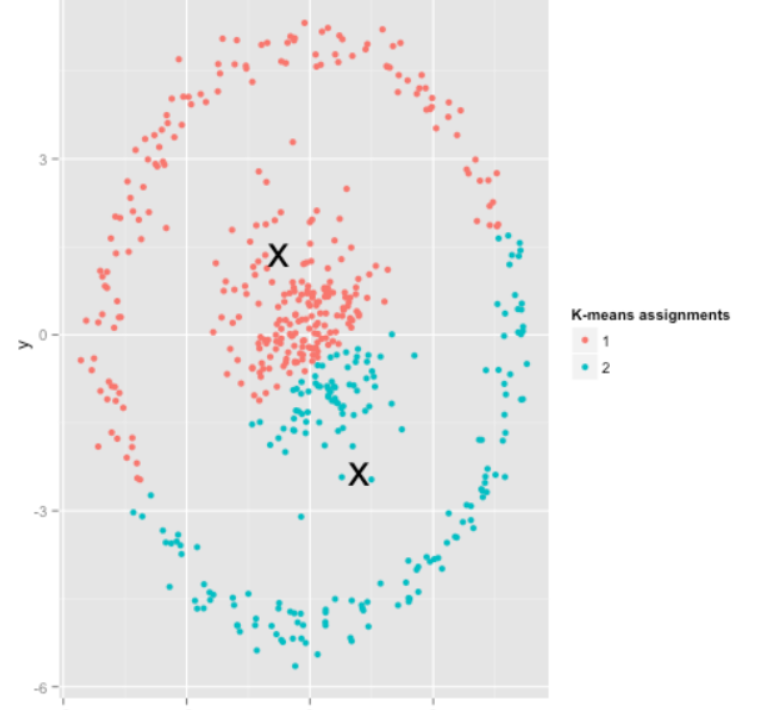

Density based methods such as DBSCAN work well here

One disadvantage with density based methods is that they are O(n^2) in number of points compared to K-means, for example, which is O(N)


Given this motivating example with a nested / complex cluster shape, let's see how DBscan identifies both the non-linear clusters

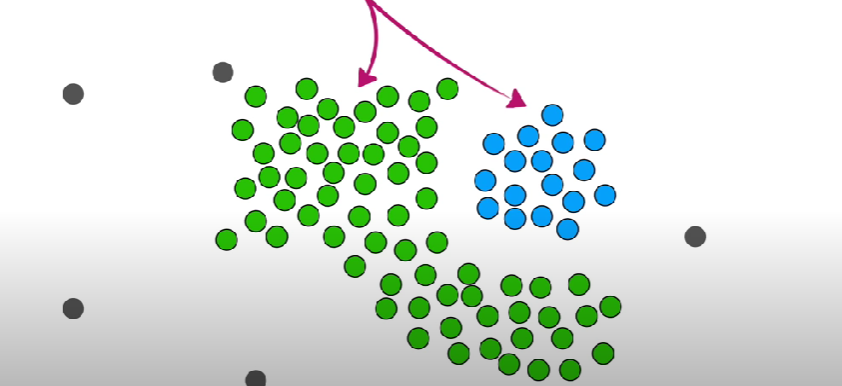




Start with raw unclustered data

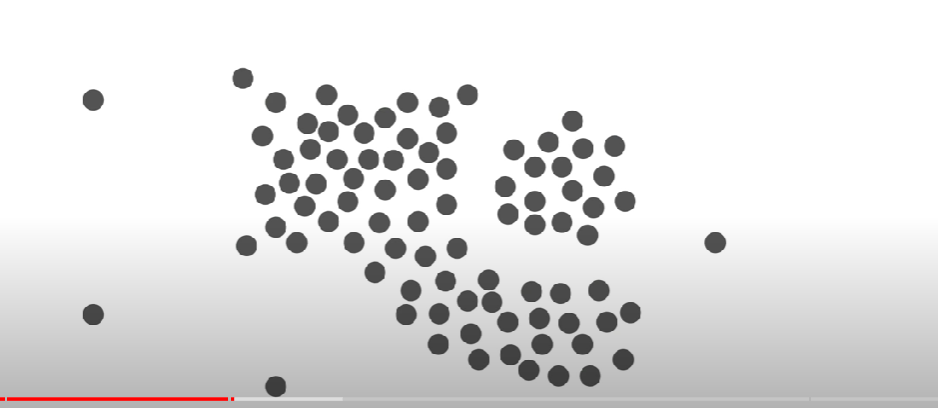


For every point, count the number the points close to the point (within a certain radius $\epsilon$ ) which is a hyperparameter in DB scan. For point A, for example, there will be 5 other points within a certain radius, for point B, 4 others and so on. Some points might not have any close points within a certain radius


Next, have another user-defined hyperparameter x which is the criteria to call a point a core point if the number of neighbours >= x

Let's say we pick x = 4. So every point in the prev step with no of neighbours >= 4 by the epsilon definition is called a core point

By this definition, all red points in the example below are core points, as the no of neighbours are >= 4

Remaining points are non-core


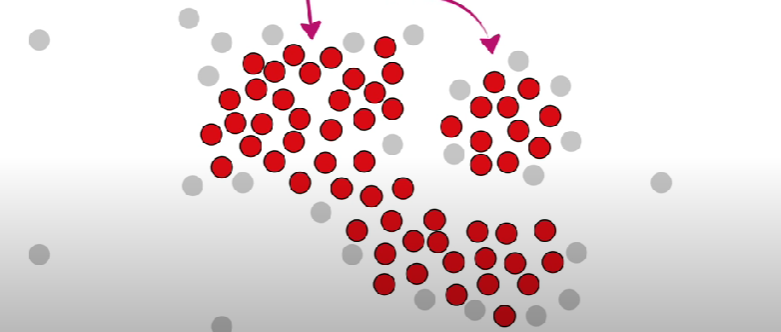



Randomly pick a core point C, assign it to cluster 1

Assign all neihbours of C which are core points to cluster 1

Assign all neighbours of neighbours of C which are core points to cluster 1

Keep continuing down the same path


Ultimately, all core points which are close to the growing first cluster are added to it

At this point, every single core point in the first cluster is added to it

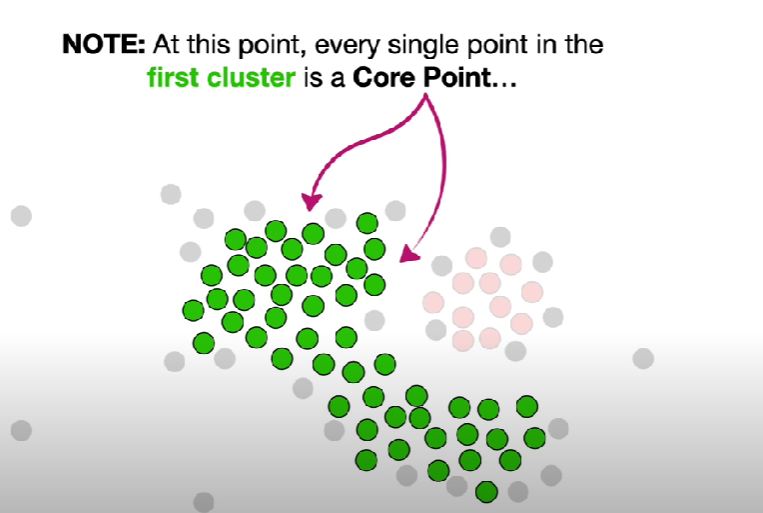


Because we can no longer add any more core points to the first cluster, we can add non-core points that are close to the core points to the first cluster. However, because it is not a non-core point, it cannot be used for extending further (This illustrates the difference between core and non-core points, Non-core points can join a cluster, but unlike core points, cannot be used to extend it)

Once we do this, we are done finishing first cluster

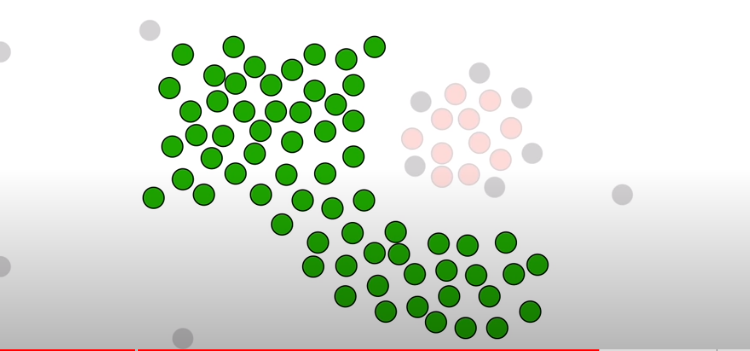


Repeat this process with a new set of core points not close to the first cluster, to form second clusters, third cluster and so on


Finally, any remaining non-core points which are not close to any of the existing clusters are called outliers

## Implementation

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
  
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [ ]:
### Loading the data

In [5]:
os.listdir("../../data")

['CC GENERAL.csv', 'emails.csv']

In [2]:
X = pd.read_csv('../../data/CC GENERAL.csv')
X.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
X.shape

(8950, 18)

In [4]:
# Dropping the CUST_ID column from the data
X = X.drop('CUST_ID', axis = 1)
  
# Handling the missing values
X.fillna(method ='ffill', inplace = True)
  

In [5]:
# Scaling the data to bring all the attributes to a comparable level
## remove mean and scale to unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
## 
  
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
## scales all values by the l2 norm of the dataset (sum of squares)
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)


In [6]:
X_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.312038,-0.106331,-0.181129,-0.152156,-0.148808,-0.198985,-0.343796,-0.289304,-0.301518,-0.287892,-0.202942,-0.217975,-0.409413,-0.225497,-0.130160,-0.224036,0.153753
1,0.219928,0.037539,-0.131224,-0.099751,-0.127038,0.728177,-0.341439,-0.189662,-0.256269,0.160403,0.030762,-0.165387,0.192455,0.228782,0.024353,0.065458,0.100798
2,0.126684,0.146785,-0.030505,0.030851,-0.128792,-0.132251,0.359775,0.757449,-0.259805,-0.191342,-0.134881,-0.030888,0.234046,-0.108741,-0.028363,-0.148900,0.102189
3,0.020571,-0.426063,0.097223,0.228832,-0.190449,-0.154451,-0.424878,-0.167299,-0.384185,-0.108474,-0.138062,-0.231084,0.346093,-0.250827,-0.041942,-0.220185,0.151110
4,-0.151630,0.218959,-0.195282,-0.146778,-0.192118,-0.197278,-0.428601,-0.168765,-0.387551,-0.285424,-0.201202,-0.233109,-0.382671,-0.153993,-0.110323,-0.222114,0.152435


### Dimensionality reduction  using PCA before clustering

In [8]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544826
2  0.330633  0.268880
3 -0.481656 -0.097613
4 -0.563512 -0.482505


### The actual DB scan

In [9]:
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal)
labels = db_default.labels_

## eps is the radius parameter we talked about earlier, min_samples is the threshold to consider a point a core point

In [12]:
from collections import Counter
Counter(labels)

Counter({0: 8920, 1: 3, -1: 23, 2: 4})

23 points have label -1 which means they didn't fall in any cluster
Most points fall in cluster 0
Very few in cluster 1 and 2

### Step 6: Visualizing the clustering

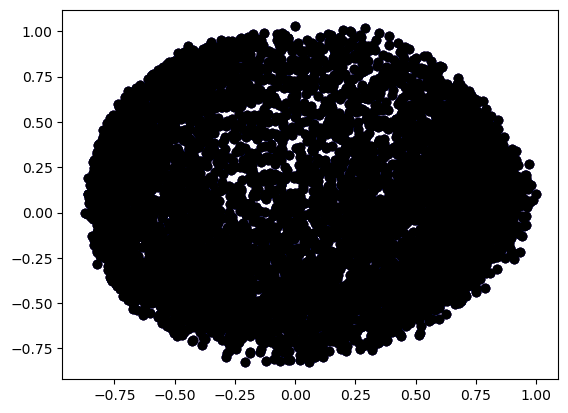

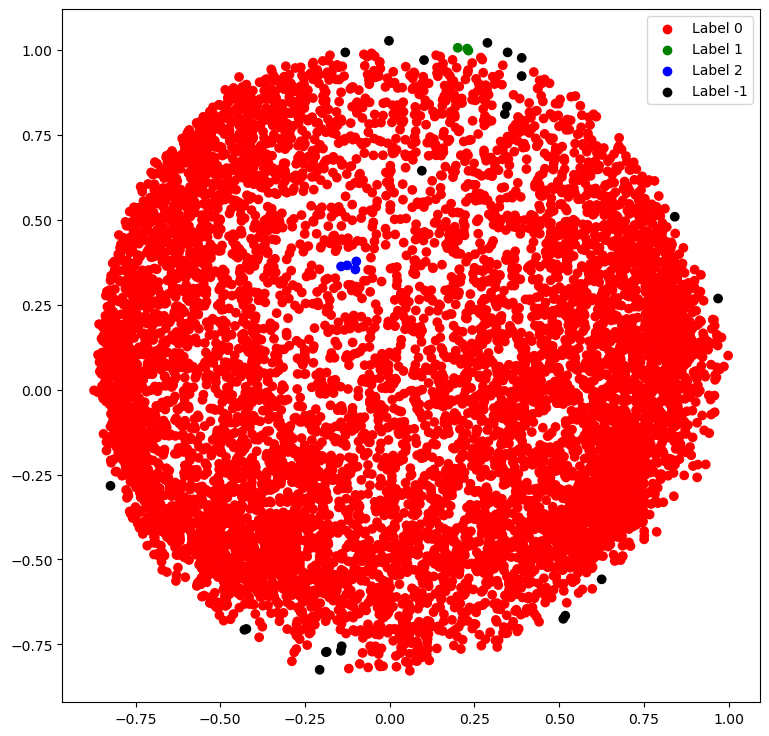

In [13]:
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in labels]
  
# For the construction of the legend of the plot
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
  
# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()

### Tuning the model parameters

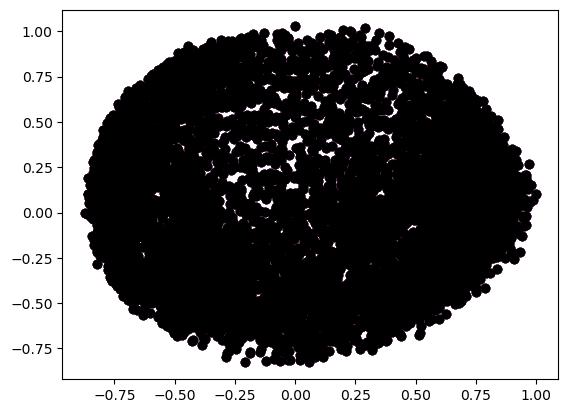

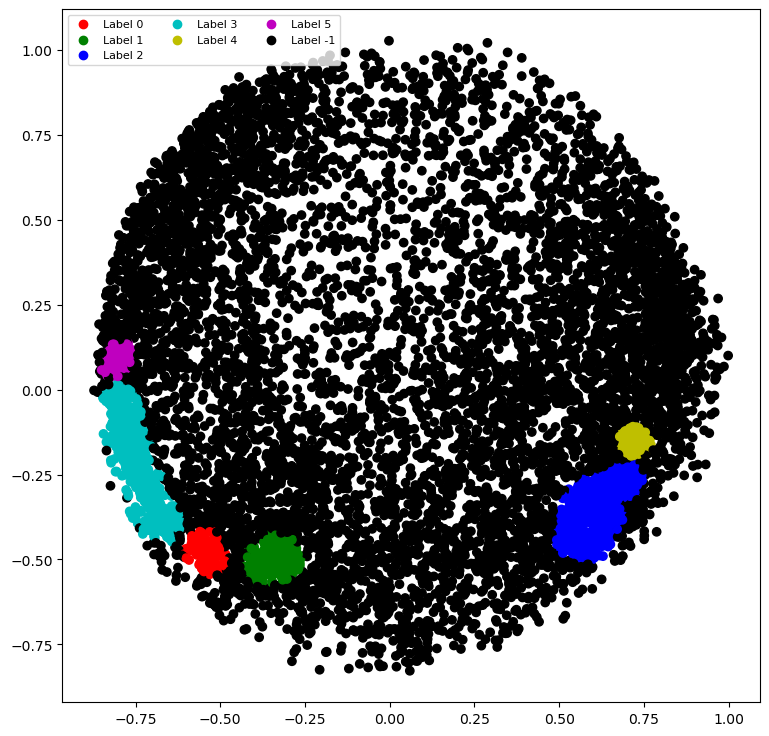

In [16]:
db_default = DBSCAN(eps = 0.0375, min_samples = 50).fit(X_principal)
labels = db_default.labels_

colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ]
  
r = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[0])
g = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[1])
b = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[2])
c = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[3])
y = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[4])
m = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[5])
k = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[6])
  
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((r, g, b, c, y, m, k),
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4',
            'Label 5', 'Label -1'),
           scatterpoints = 1,
           loc ='upper left',
           ncol = 3,
           fontsize = 8)
plt.show()

In [17]:
Counter(labels)

Counter({-1: 7218, 0: 134, 2: 564, 1: 217, 3: 646, 5: 88, 4: 83})

## References

1. https://www.youtube.com/watch?v=RDZUdRSDOok
2. https://www.geeksforgeeks.org/implementing-dbscan-algorithm-using-sklearn/